<a href="https://colab.research.google.com/github/Samuyel-256/Edunet/blob/main/K_Means_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import matplotlib.pyplot as plt # Import the matplotlib library and assign it the alias 'plt'
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

In [32]:
mall_data = pd.read_csv('Mall_Customers.csv')
print(mall_data.shape)

print('There are {} rows and {} columns in our dataset.'.format(mall_data.shape[0],mall_data.shape[1]))

(200, 5)
There are 200 rows and 5 columns in our dataset.


In [33]:
mall_data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
86,87,Female,55,57,58
186,187,Female,54,101,24
40,41,Female,65,38,35
81,82,Male,38,54,55
152,153,Female,44,78,20
58,59,Female,27,46,51
172,173,Male,36,87,10
147,148,Female,32,77,74
138,139,Male,19,74,10
116,117,Female,63,65,43


In [34]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [35]:
mall_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


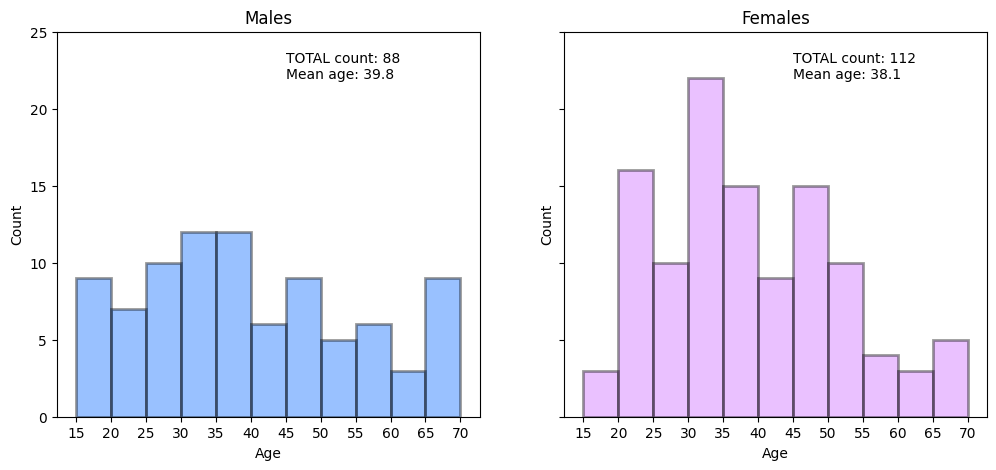

In [36]:
males_age = mall_data[mall_data['Gender']=='Male']['Age'] # subset with males age

females_age = mall_data[mall_data['Gender']=='Female']['Age'] # subset with females age

age_bins = range(15,75,5)

# males histogram

fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)

sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))

ax1.set_xticks(age_bins)

ax1.set_ylim(top=25)

ax1.set_title('Males')

ax1.set_ylabel('Count')

ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))

ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram

sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))

ax2.set_xticks(age_bins)

ax2.set_title('Females')

ax2.set_ylabel('Count')

ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))

ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()


In [37]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomorov-Smirnov test p-value: 0.49


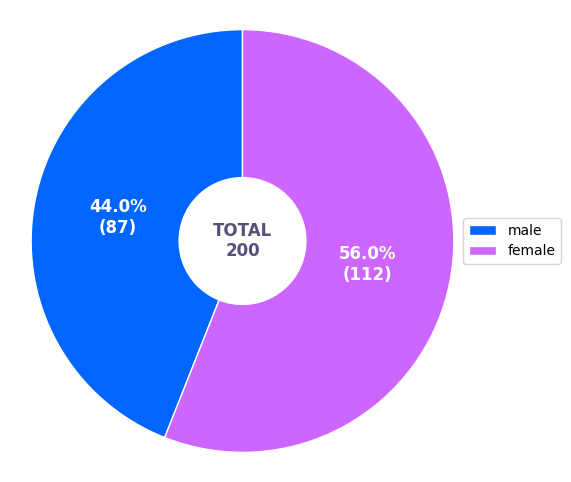

In [38]:
def labeler(pct, allvals):

    absolute = int(pct/100.*np.sum(allvals))

    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(),females_age.count()] # wedge sizes

fig0, ax1 = plt.subplots(figsize=(6,6))

wedges, texts, autotexts = ax1.pie(sizes,

                                   autopct=lambda pct: labeler(pct, sizes),

                                   radius=1,

                                   colors=['#0066ff','#cc66ff'],

                                   startangle=90,

                                   textprops=dict(color="w"),

                                   wedgeprops=dict(width=0.7, edgecolor='w'))

ax1.legend(wedges, ['male','female'],

           loc='center right',

           bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(mall_data['Age'].count()),

         weight='bold', size=12, color='#52527a',

         ha='center', va='center')

plt.setp(autotexts, size=12, weight='bold')

ax1.axis('equal')  # Equal aspect ratio

plt.show()


In [39]:
medians_by_age_group = mall_data.groupby(["Gender",pd.cut(mall_data['Age'], age_bins)]).median()

medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])

medians_by_age_group.reset_index(inplace=True)


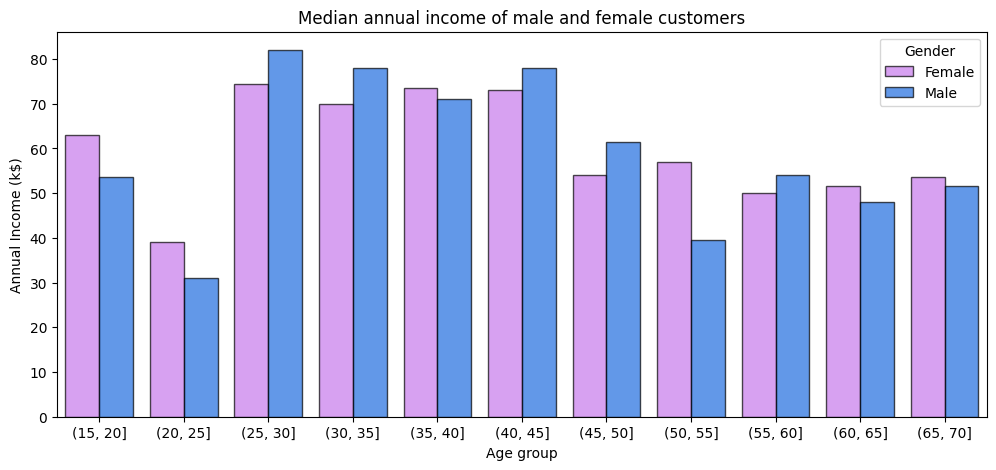

In [40]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

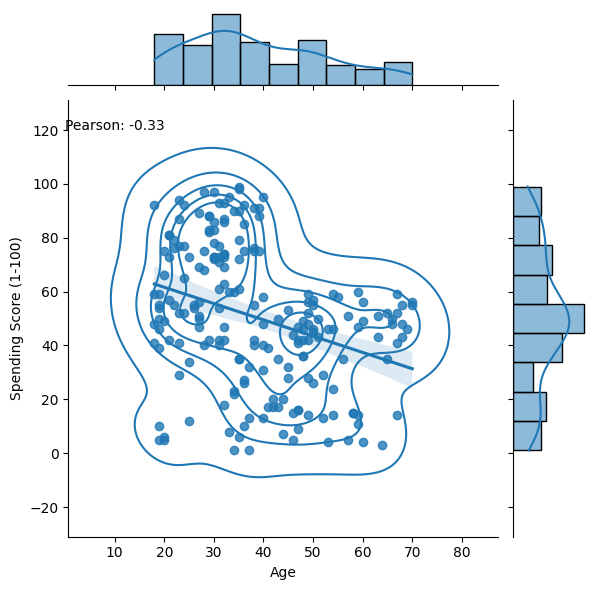

In [41]:
from scipy.stats import pearsonr

# calculating Pearson's correlation
corr, _ = pearsonr(mall_data['Age'], mall_data['Spending Score (1-100)'])

jp = (sns.jointplot(x='Age', y='Spending Score (1-100)', data=mall_data,
                    kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(0,120, 'Pearson: {:.2f}'.format(corr))
plt.show()

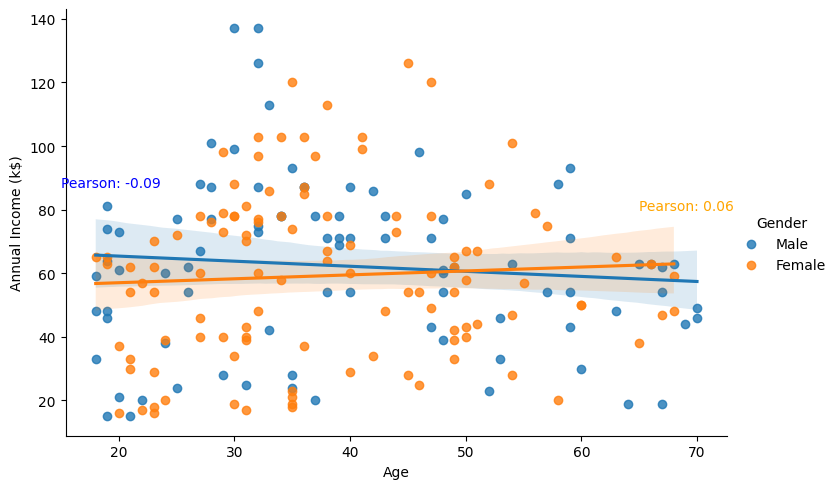

In [43]:
# calculating Pearson's correlations
males_income = mall_data[mall_data['Gender']=='Male']['Annual Income (k$)'] # subset with males income
females_income = mall_data[mall_data['Gender']=='Female']['Annual Income (k$)'] # subset with females income

corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot(x='Age', y='Annual Income (k$)', data=mall_data, hue='Gender',
          aspect=1.5)

plt.text(15,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

In [44]:
from sklearn.cluster import KMeans


In [45]:
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only

In [46]:
!pip install yellowbrick

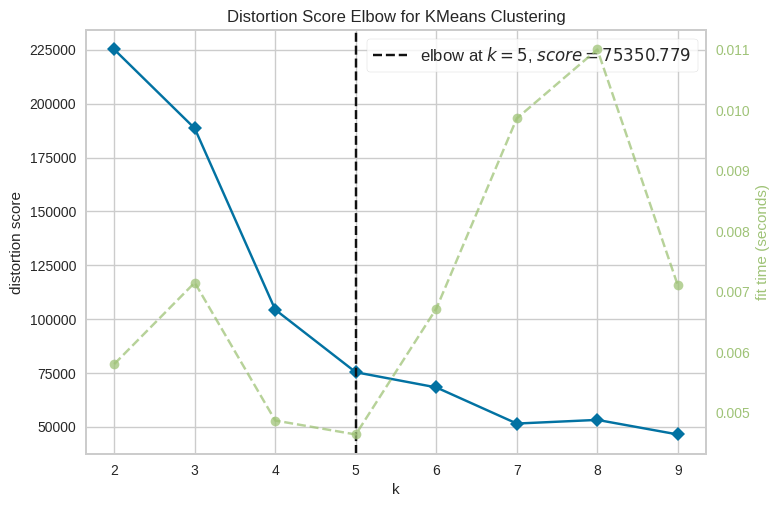

In [47]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

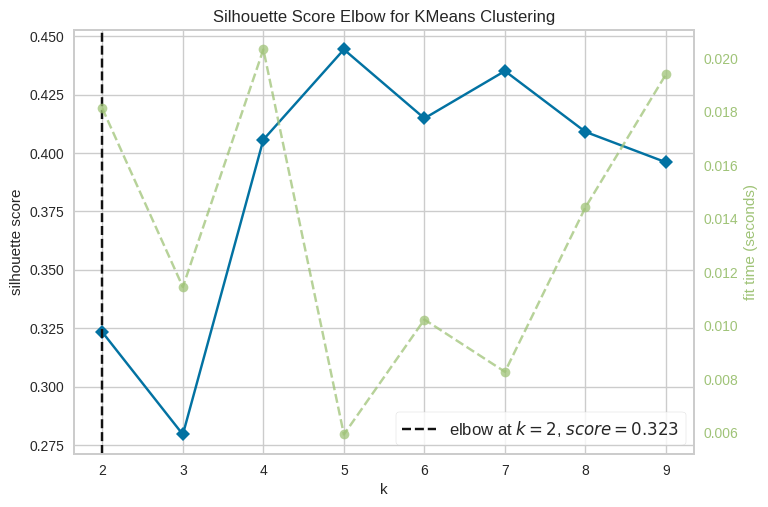

In [48]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [49]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

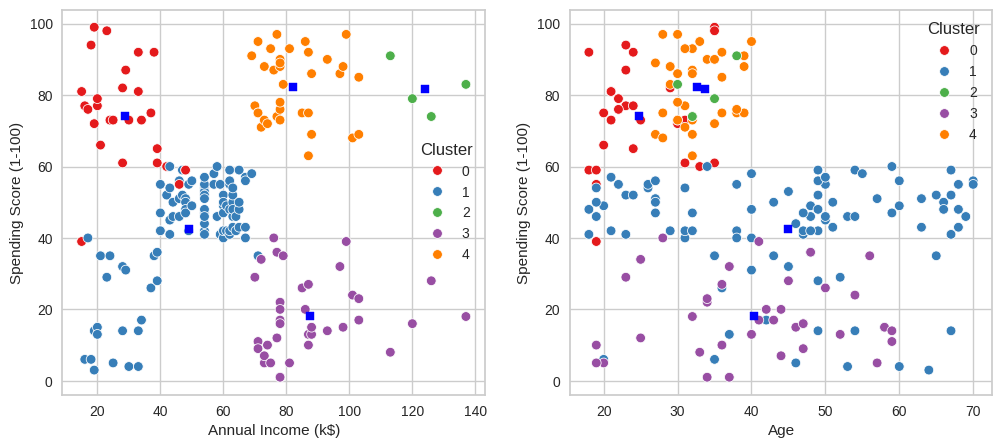

In [50]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

In [52]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,28
1,96
2,4
3,37
4,35
